In [90]:
#Import all required libraries to create a SVM Classifier Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [64]:
# Load the data set
Data = pd.read_csv(r"C:\Users\Vinoth\Dropbox\PC\Desktop\HOPE AI\Machine Learning\Classification_Models\DataSets\Social_Network_Ads.csv")

In [65]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [66]:
Data.shape

(400, 5)

In [67]:
Data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [68]:
len(Data[(Data['Gender']=='Male') & (Data['Purchased']==1)])

66

In [72]:
len(Data[(Data['Gender']=='Male') & (Data['Purchased']==0)])

130

In [75]:
len(Data[(Data['Gender']=='Female') & (Data['Purchased']==1)])

77

In [74]:
len(Data[(Data['Gender']=='Female') & (Data['Purchased']==0)])

127

In [69]:
Data[(Data['Gender']=='Male') & (Data['Purchased']==1)]['Gender'].index

Int64Index([ 16,  17,  18,  20,  22,  24,  25,  26,  48,  63,  75,  97, 137,
            160, 168, 211, 219, 221, 222, 223, 227, 232, 233, 235, 240, 261,
            264, 272, 273, 275, 277, 282, 290, 291, 292, 296, 299, 301, 303,
            308, 311, 318, 328, 334, 336, 339, 344, 346, 354, 355, 356, 358,
            360, 364, 367, 371, 373, 378, 381, 383, 385, 388, 390, 391, 393,
            396],
           dtype='int64')

In [70]:
Data.loc[(Data['Gender']=='Male') & (Data['Purchased']==1),'Gender']=66

In [73]:
Data.loc[(Data['Gender']=='Male') & (Data['Purchased']==0),'Gender']=130

In [76]:
Data.loc[(Data['Gender']=='Female') & (Data['Purchased']==1),'Gender']=77

In [77]:
Data.loc[(Data['Gender']=='Female') & (Data['Purchased']==0),'Gender']=127

In [78]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,130,19,19000,0
1,15810944,130,35,20000,0
2,15668575,127,26,43000,0
3,15603246,127,27,57000,0
4,15804002,130,19,76000,0


In [82]:
Data.rename(columns={'Gender': 'Gender_count'},inplace=True)

In [83]:
Data.columns

Index(['User ID', 'Gender_count', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [84]:
# Let's Seperate dependent and independent variables

independent = Data[['Gender_count','Age', 'EstimatedSalary']]
dependent = Data[['Purchased']]

In [85]:
dependent.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [86]:
independent.head()

,Gender_count,Age,EstimatedSalary
0,130,19,19000
1,130,35,20000
2,127,26,43000
3,127,27,57000
4,130,19,76000


In [94]:
# Standardize the data
Std =StandardScaler()
independent_trsm = Std.fit_transform(independent)


In [95]:
independent_trsm.shape

(400, 3)

In [96]:
independent_trsm

array([[ 0.79403807, -1.78179743, -1.49004624],
       [ 0.79403807, -0.25358736, -1.46068138],
       [ 0.68433905, -1.11320552, -0.78528968],
       ...,
       [-1.14397795,  1.17910958, -1.46068138],
       [ 0.79403807, -0.15807423, -1.07893824],
       [-1.14397795,  1.08359645, -0.99084367]])

In [97]:
# Lets Split Train and Test Data

X_Train,X_Test,Y_Train,Y_Test = train_test_split(independent_trsm,dependent,random_state=0,test_size=0.30)

In [98]:
# Lets Create the Model using training data and default parameters
SVM_Classifier_Model = SVC(class_weight=None)
SVM_Classifier_Model.fit(X_Train,Y_Train)

C:\Users\Vinoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [99]:
# Lets Test the model using the Test Data
Y_Predicted = SVM_Classifier_Model.predict(X_Test)

In [100]:
# Lets check the performance of the model using confusion Matrix 
confusion_matrix(Y_Predicted,Y_Test)

array([[79,  0],
       [ 0, 41]], dtype=int64)

In [101]:
# importing the classification report function from sklearn.metrics module
from sklearn.metrics import classification_report

In [102]:
clf_report =classification_report(Y_Predicted,Y_Test)

In [103]:
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [22]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [104]:
# Initializing the model params for SVM Classifier to pass it as input for gridsearch CV
model_Params = {'C':[0.01,0.001,0.0001,0.1,1.0,10,50,100,1000,10000],"kernel":["linear", "poly", "rbf", "sigmoid"],"degree":[1,2,3],"gamma":['scale','auto'],
               "class_weight":[None,'balanced'],"decision_function_shape":['ovo','ovr']}


# model_Params = {'C':[0.01,0.001,0.0001],"kernel":["linear", "poly", "rbf", "sigmoid"],"gamma":['scale','auto'],
#                 "class_weight":['balanced'],"decision_function_shape":['ovr']}

In [105]:
# Invoking the gridsearch CV and pasing the appropriate parameters
import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
#SVM_Classifier_Model_GridSearch = GridSearchCV(SVC(),model_Params,scoring = {'acu_score': 'accuracy','r2_score': 'r2'},refit='r2_score',n_jobs=n_jobs,verbose=2)
SVM_Classifier_Model_GridSearch = GridSearchCV(SVC(),model_Params,scoring='f1',refit=True,n_jobs=n_jobs,verbose=2)
#SVM_Classifier_Model_GridSearch = GridSearchCV(SVC(),model_Params,refit=False,n_jobs=n_jobs,verbose=2)

In [106]:
# Lets fit the GRID Search CV to the training data
import warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
SVM_Classifier_Model_GridSearch.fit(X_Train,Y_Train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(estimator=SVC(), n_jobs=19,
             param_grid={'C': [0.01, 0.001, 0.0001, 0.1, 1.0, 10, 50, 100, 1000,
                               10000],
                         'class_weight': [None, 'balanced'],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=2)

In [107]:
# Best Parameter combination that has performed high than other combinations
SVM_Classifier_Model_GridSearch.best_params_

{'C': 0.01,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'linear'}

In [108]:
# Best Score that training model has performed from the parameter combinations
SVM_Classifier_Model_GridSearch.best_score_

1.0

In [109]:
# Loading the crsoss validation results to the dataframe
Df = pd.DataFrame.from_dict(SVM_Classifier_Model_GridSearch.cv_results_)

In [110]:
Df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012109,0.003587,0.002675,0.003380,0.01,None,ovo,1,scale,linear,"{'C': 0.01, 'class_weight': None, 'decision_fu...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
1,0.009696,0.003156,0.001600,0.003199,0.01,None,ovo,1,scale,poly,"{'C': 0.01, 'class_weight': None, 'decision_fu...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
2,0.008782,0.001540,0.000902,0.001805,0.01,None,ovo,1,scale,rbf,"{'C': 0.01, 'class_weight': None, 'decision_fu...",0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,849
3,0.009609,0.003195,0.000000,0.000000,0.01,None,ovo,1,scale,sigmoid,"{'C': 0.01, 'class_weight': None, 'decision_fu...",1.0,1.0,0.974359,0.97561,0.97561,0.985116,0.012162,701
4,0.004803,0.003922,0.001600,0.003200,0.01,None,ovo,1,auto,linear,"{'C': 0.01, 'class_weight': None, 'decision_fu...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.005781,0.006130,0.000000,0.000000,10000,balanced,ovr,3,scale,sigmoid,"{'C': 10000, 'class_weight': 'balanced', 'deci...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
956,0.001151,0.001114,0.000602,0.001203,10000,balanced,ovr,3,auto,linear,"{'C': 10000, 'class_weight': 'balanced', 'deci...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
957,0.003072,0.003413,0.001602,0.003204,10000,balanced,ovr,3,auto,poly,"{'C': 10000, 'class_weight': 'balanced', 'deci...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1
958,0.003787,0.004639,0.001857,0.002723,10000,balanced,ovr,3,auto,rbf,"{'C': 10000, 'class_weight': 'balanced', 'deci...",1.0,1.0,1.000000,1.00000,1.00000,1.000000,0.000000,1


In [111]:
# Now test the model from the best hyperparameter that we have got from GRID Serach CV
Predicted_Y = SVM_Classifier_Model_GridSearch.predict(X_Test)

In [112]:
confusion_matrix(Y_Test,Y_Predicted)

array([[79,  0],
       [ 0, 41]], dtype=int64)

In [113]:
Final_report = classification_report(Y_Test,Y_Predicted)

In [114]:
# Final Report for the tested data against the best parameters
print(Final_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



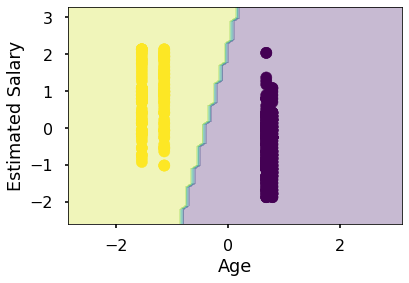

In [115]:

# Trying to plot teh decision boundaries for the trained model using anly two input and one output values
import matplotlib.pyplot as plt

# Define the plotting function
def plot_decision_boundary(clf, X, y, X_Label,Y_Label):
    # Set the bounds of the plot
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),[0]*len(xx.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
    plt.xlabel(X_Label)
    plt.ylabel(Y_Label)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(SVM_Classifier_Model_GridSearch, independent_trsm, np.array(dependent),"Age","Estimated Salary")

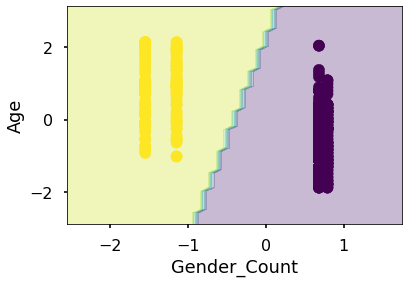

In [118]:

# Trying to plot teh decision boundaries for the trained model using anly two input and one output values
import matplotlib.pyplot as plt

# Define the plotting function
def plot_decision_boundary(clf, X, y, X_Label,Y_Label):
    # Set the bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),[0]*len(xx.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
    plt.xlabel(X_Label)
    plt.ylabel(Y_Label)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(SVM_Classifier_Model_GridSearch, independent_trsm, np.array(dependent),"Gender_Count","Age")

In [130]:
independent_trsm.shape

(400, 3)

-2.54620768483867 1.7940380720414268
-2.6075056615492507 3.3567499772898386
2640
60
(60, 44)
60
(60, 44)
[-2.54620768 -2.44620768 -2.34620768 -2.24620768 -2.14620768 -2.04620768
 -1.94620768 -1.84620768 -1.74620768 -1.64620768 -1.54620768 -1.44620768
 -1.34620768 -1.24620768 -1.14620768 -1.04620768 -0.94620768 -0.84620768
 -0.74620768 -0.64620768 -0.54620768 -0.44620768 -0.34620768 -0.24620768
 -0.14620768 -0.04620768  0.05379232  0.15379232  0.25379232  0.35379232
  0.45379232  0.55379232  0.65379232  0.75379232  0.85379232  0.95379232
  1.05379232  1.15379232  1.25379232  1.35379232  1.45379232  1.55379232
  1.65379232  1.75379232]
[-2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566
 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566
 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566
 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566
 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60750566 -2.60

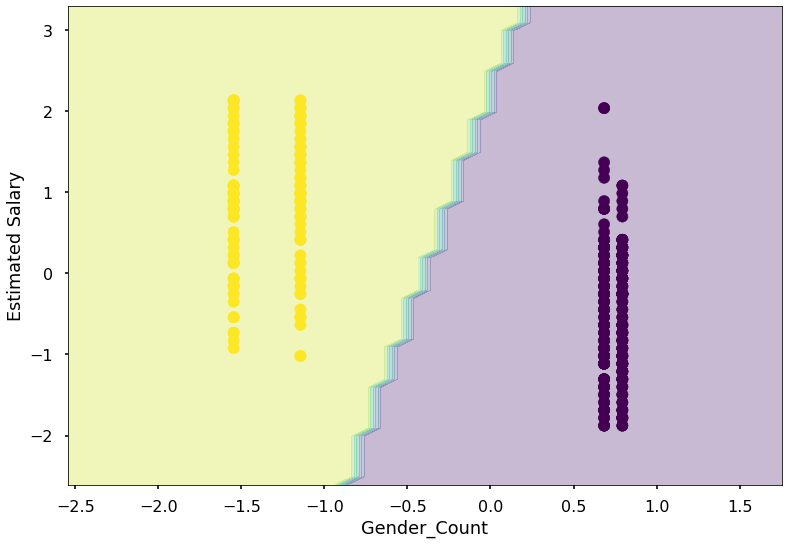

In [138]:

# Trying to plot teh decision boundaries for the trained model using anly two input and one output values
import matplotlib.pyplot as plt

# Define the plotting function
def plot_decision_boundary(clf, X, y, X_Label,Y_Label):
    # Set the bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    print(x_min,x_max)
    print(y_min,y_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    print(len(xx.ravel()))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel(),[0]*len(xx.ravel())])
    Z = Z.reshape(xx.shape)
    print(len(xx))
    print(xx.shape)
    print(len(yy))
    print(yy.shape)
    print(xx[0])
    print(yy[0])
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
    plt.xlabel(X_Label)
    plt.ylabel(Y_Label)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(SVM_Classifier_Model_GridSearch, independent_trsm, np.array(dependent),"Gender_Count","Estimated Salary")

In [139]:
len(np.arange(-2.54620768483867, 1.7940380720414268, 0.1))

44

In [140]:
len(np.arange(-2.6075056615492507, 3.3567499772898386, 0.1))

60

In [120]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [121]:
plt.style.use('seaborn-poster')

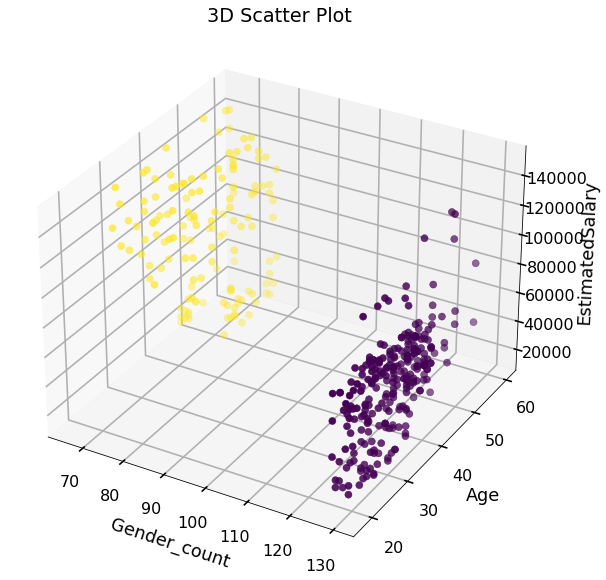

In [126]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(independent['Gender_count'], independent['Age'], independent["EstimatedSalary"], c = dependent, s = 50,data=Data)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('Gender_count', labelpad=20)
ax.set_ylabel('Age', labelpad=20)
ax.set_zlabel('EstimatedSalary', labelpad=20)

ax.plot_surface(X, Y, Z2,color='r',alpha=.3) #plot the surface

plt.show()

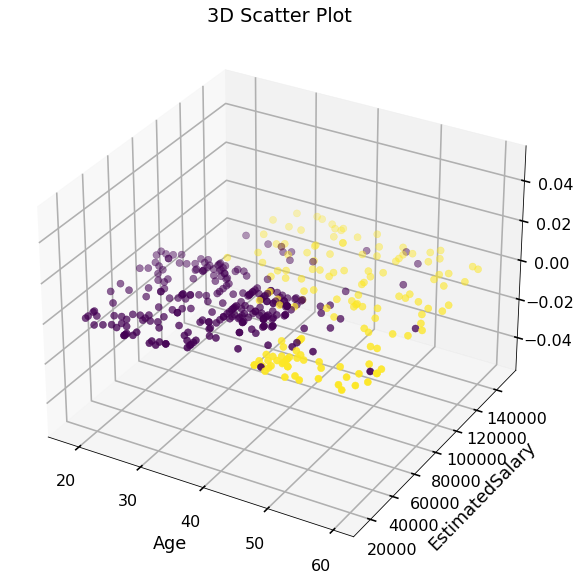

In [125]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(independent['Age'], independent["EstimatedSalary"], c = dependent, s = 50,data=Data)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('Age', labelpad=20)
ax.set_ylabel('EstimatedSalary', labelpad=20)
#ax.set_zlabel('EstimatedSalary', labelpad=20)

plt.show()